<a href="https://colab.research.google.com/github/lingamnikhil/ML_Assignment1/blob/main/Nikhil_Lingam_ML_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/Housing.csv'
house_data = pd.read_csv(file_path)
house_data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
house_data.isnull().sum() * 100 / house_data.shape[0]


,0
price,0.0
area,0.0
bedrooms,0.0
bathrooms,0.0
stories,0.0
mainroad,0.0
guestroom,0.0
basement,0.0
hotwaterheating,0.0
airconditioning,0.0


In [5]:
np.random.seed(0)
training, testing = train_test_split(house_data, train_size=0.8, test_size=0.2, random_state=100)

In [6]:

def preprocess(data, variables):
    house_data_new = data[variables].replace({'yes': 1, 'no': 0})
    x = house_data_new.iloc[:, 1:]
    m = x.shape[0]
    y = np.array(house_data_new.iloc[:, 0], dtype=np.float64).reshape(m, 1)
    x = np.array(x, dtype=np.float64)
    f_col = np.ones((m, 1))
    x = np.hstack((f_col, x))
    return x, y

In [7]:
def gradient_descent(X_training, X_testing, Y_training, Y_testing, initial_theta, learning_rate, num_iterations):
    m_training = len(Y_training)
    m_testing = len(Y_testing)
    theta = initial_theta
    training_losses = []
    testing_losses = []

    for i in range(num_iterations):
        predictions_training = X_training.dot(theta)
        error_training = predictions_training - Y_training
        gradient = (X_training.T.dot(error_training)) / m_training
        theta -= learning_rate * gradient
        training_loss = np.sum(error_training ** 2) / (2 * m_training)
        training_losses.append(training_loss)

        predictions_testing = X_testing.dot(theta)
        error_testing = predictions_testing - Y_testing
        testing_loss = np.sum(error_testing ** 2) / (2 * m_testing)
        testing_losses.append(testing_loss)

    return theta, training_losses, testing_losses

In [8]:
variables = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_training1a, Y_training1a = preprocess(training, variables)
X_testing1a, Y_testing1a = preprocess(testing, variables)

In [9]:
theta = np.zeros((6, 1))
num_iterations1 = 10000
learning_rate1 = 0.00000001
theta1a_1, loss_train1a_1, loss_test1a_1 = gradient_descent(X_training1a, X_testing1a, Y_training1a, Y_testing1a, theta, learning_rate1, num_iterations1)
print("Final values of theta (parameters):")
print(theta)


Final values of theta (parameters):
[[ 36.2275036 ]
 [861.78243054]
 [136.65509257]
 [ 79.75619333]
 [122.6182102 ]
 [ 28.32212468]]


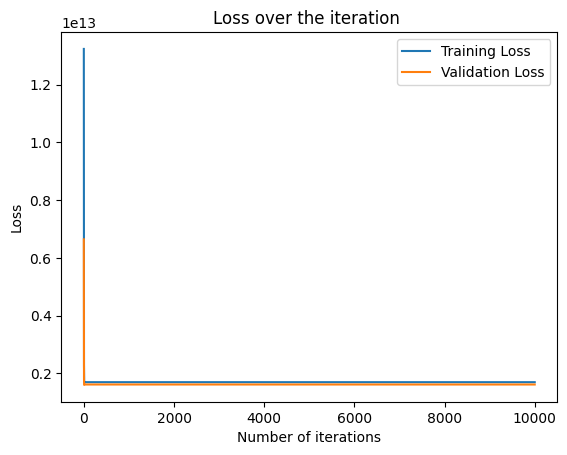

In [10]:
plt.plot(range(num_iterations1), loss_train1a_1, label="Training Loss")
plt.plot(range(num_iterations1), loss_test1a_1, label="Validation Loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration ')
plt.legend()
plt.show()

In [11]:
theta = np.zeros((6, 1))
num_iterations2 = 50
learning_rate2 = 0.05
theta1a_2, loss_train1a_2, loss_test1a_2 = gradient_descent(X_training1a, X_testing1a, Y_training1a, Y_testing1a, theta, learning_rate2, num_iterations2)
print("Final theta values  (after 50 iterations with larger learning rate):")
print(theta1a_2)

Final theta values  (after 50 iterations with larger learning rate):
[[-inf]
 [ nan]
 [-inf]
 [-inf]
 [-inf]
 [ nan]]


<ipython-input-7-de912d368d99>:18: RuntimeWarning: overflow encountered in square
  testing_loss = np.sum(error_testing ** 2) / (2 * m_testing)
<ipython-input-7-de912d368d99>:13: RuntimeWarning: overflow encountered in square
  training_loss = np.sum(error_training ** 2) / (2 * m_training)
<ipython-input-7-de912d368d99>:12: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradient


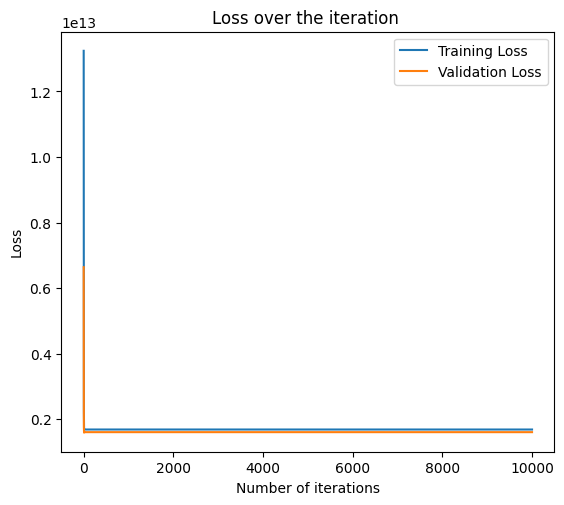

In [12]:
plt.figure(figsize=(14, 12))
plt.subplot(2, 2, 1)
plt.plot(range(num_iterations1), loss_train1a_1, label="Training Loss")
plt.plot(range(num_iterations1), loss_test1a_1, label="Validation Loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration ')
plt.legend()

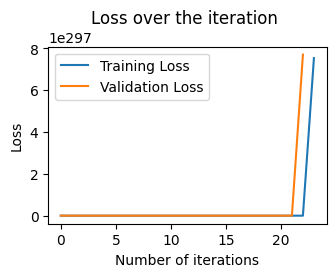

In [13]:
plt.subplot(2, 2, 2)
plt.plot(range(num_iterations2), loss_train1a_2, label="Training Loss")
plt.plot(range(num_iterations2), loss_test1a_2, label="Validation Loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration ')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
variables1 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X_training1b, Y_training1b = preprocess(training, variables1)
X_testing1b, Y_testing1b = preprocess(testing, variables1)

<ipython-input-6-8c188dc6f76f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house_data_new = data[variables].replace({'yes': 1, 'no': 0})
<ipython-input-6-8c188dc6f76f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house_data_new = data[variables].replace({'yes': 1, 'no': 0})


In [15]:
theta = np.zeros((12, 1))
num_iterations1 = 1500
learning_rate1 = 0.000000001
theta1b_1, loss_train1b_1, loss_test1b_1 = gradient_descent(X_training1b, X_testing1b, Y_training1b, Y_testing1b, theta, learning_rate1, num_iterations1)
print("Theta values for Problem 1b:")
print(theta1b_1)

Theta values for Problem 1b:
[[6.83989834e-01]
 [8.61912304e+02]
 [2.46906244e+00]
 [1.38341771e+00]
 [2.09839696e+00]
 [5.93446945e-01]
 [2.37475492e-01]
 [3.76360552e-01]
 [1.09144032e-01]
 [5.09626253e-01]
 [5.44770822e-01]
 [2.58799839e-01]]


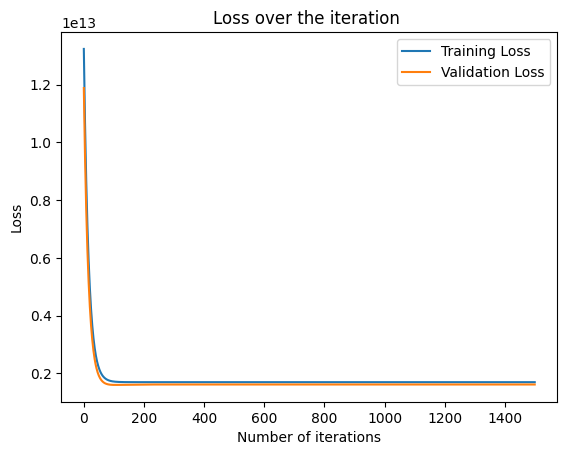

In [16]:
plt.plot(range(num_iterations1), loss_train1b_1, label="Training Loss")
plt.plot(range(num_iterations1), loss_test1b_1, label="Validation Loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration ')
plt.legend()
plt.show()

In [17]:
theta = np.zeros((12, 1))
num_iterations2 = 50
learning_rate2 = 0.001
theta1b_2, loss_train1b_2, loss_test1b_2 = gradient_descent(X_training1b, X_testing1b, Y_training1b, Y_testing1b, theta, learning_rate2, num_iterations2)


<ipython-input-7-de912d368d99>:18: RuntimeWarning: overflow encountered in square
  testing_loss = np.sum(error_testing ** 2) / (2 * m_testing)
<ipython-input-7-de912d368d99>:13: RuntimeWarning: overflow encountered in square
  training_loss = np.sum(error_training ** 2) / (2 * m_training)


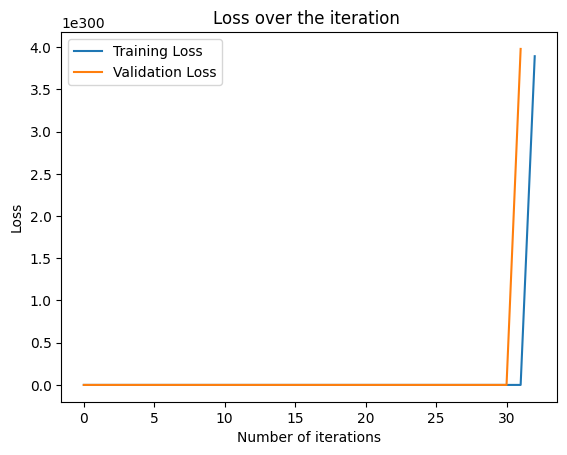

In [18]:
plt.plot(range(num_iterations2), loss_train1b_2, label="Training Loss")
plt.plot(range(num_iterations2), loss_test1b_2, label="Validation Loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration ')
plt.legend()
plt.show()


In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [20]:
scaler = MinMaxScaler()
standard = StandardScaler()

In [21]:
x_training_scaler = scaler.fit_transform(X_training1a)
x_testing_scaler = scaler.fit_transform(X_testing1a)
x_training_normalized = standard.fit_transform(X_training1a)
x_testing_normalized = standard.fit_transform(X_testing1a)

In [22]:
theta = np.zeros((6, 1))
num_iterations1 = 1500
learning_rate = 0.05
theta2a, loss_train2a, loss_test2a = gradient_descent(x_training_scaler, x_testing_scaler, Y_training1a, Y_testing1a, theta, learning_rate, num_iterations1)


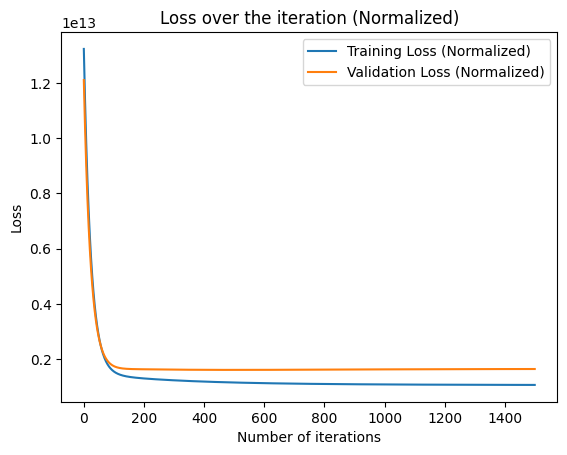

Theta for Normalized Data (2a): [[      0.        ]
 [6121611.13914518]
 [5488741.02006289]
 [2532537.6407956 ]
 [1575783.97385013]
 [1359924.0865643 ]]


In [23]:
plt.plot(range(num_iterations1), loss_train2a, label="Training Loss (Normalized)")
plt.plot(range(num_iterations1), loss_test2a, label="Validation Loss (Normalized)")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration (Normalized)')
plt.legend()
plt.show()
print("Theta for Normalized Data (2a):", theta2a)

In [24]:
theta = np.zeros((6, 1))
num_iterations2 = 1500
learning_rate = 0.05
theta2a1, loss_train2a1, loss_test2a1 = gradient_descent(x_training_normalized, x_testing_normalized, Y_training1a, Y_testing1a, theta, learning_rate, num_iterations2)


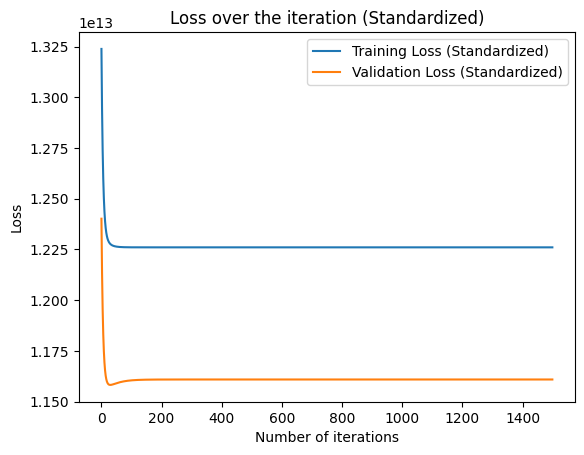

Theta for Standardized Data (2a): [[     0.        ]
 [729932.35589788]
 [ 79334.74233422]
 [641264.73850837]
 [463855.86668605]
 [287331.21112435]]


In [25]:
plt.plot(range(num_iterations2), loss_train2a1, label="Training Loss (Standardized)")
plt.plot(range(num_iterations2), loss_test2a1, label="Validation Loss (Standardized)")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration (Standardized)')
plt.legend()
plt.show()
print("Theta for Standardized Data (2a):", theta2a1)

In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [27]:
variables1 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X_training1b, Y_training1b = preprocess(training, variables1)
X_testing1b, Y_testing1b = preprocess(testing, variables1)


<ipython-input-6-8c188dc6f76f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house_data_new = data[variables].replace({'yes': 1, 'no': 0})
<ipython-input-6-8c188dc6f76f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house_data_new = data[variables].replace({'yes': 1, 'no': 0})


In [28]:
scaler = MinMaxScaler()
standard = StandardScaler()

In [29]:
x_training_scaler2b = scaler.fit_transform(X_training1b)
x_testing_scaler2b = scaler.transform(X_testing1b)

In [30]:
x_training_normalized2b = standard.fit_transform(X_training1b)
x_testing_normalized2b = standard.transform(X_testing1b)

In [31]:
y_scaler = MinMaxScaler()  # Can also use StandardScaler
Y_training1b_scaled = y_scaler.fit_transform(Y_training1b)
Y_testing1b_scaled = y_scaler.transform(Y_testing1b)


In [32]:
theta = np.zeros((12, 1))
num_iterations = 1500
learning_rate = 0.05
theta2b_y, loss_train2b_y, loss_test2b_y = gradient_descent(x_training_scaler2b, x_testing_scaler2b, Y_training1b_scaled, Y_testing1b_scaled, theta, learning_rate, num_iterations)



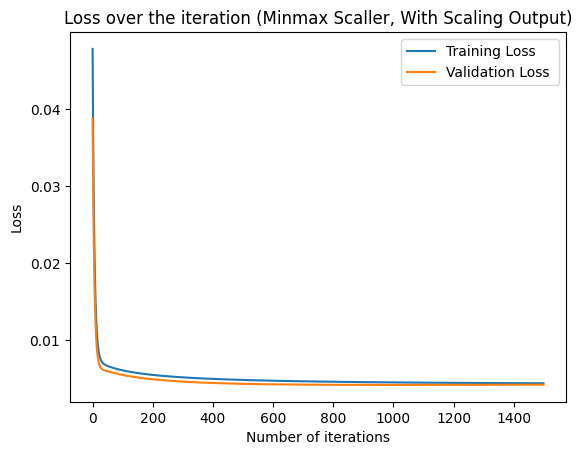

Theta Minmax Scaller (With Scaling y): [[0.        ]
 [0.23967007]
 [0.07715435]
 [0.25647909]
 [0.10812997]
 [0.05605405]
 [0.03895218]
 [0.02478179]
 [0.0790751 ]
 [0.0794342 ]
 [0.08012832]
 [0.05591604]]


In [33]:
plt.plot(range(num_iterations), loss_train2b_y, label="Training Loss ")
plt.plot(range(num_iterations), loss_test2b_y, label="Validation Loss ")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration (Minmax Scaller, With Scaling Output)')
plt.legend()
plt.show()
print("Theta Minmax Scaller (With Scaling y):", theta2b_y)


In [34]:
theta = np.zeros((12, 1))
theta2b1_y, loss_train2b1_y, loss_test2b1_y = gradient_descent(x_training_normalized2b, x_testing_normalized2b, Y_training1b_scaled, Y_testing1b_scaled, theta, learning_rate, num_iterations)


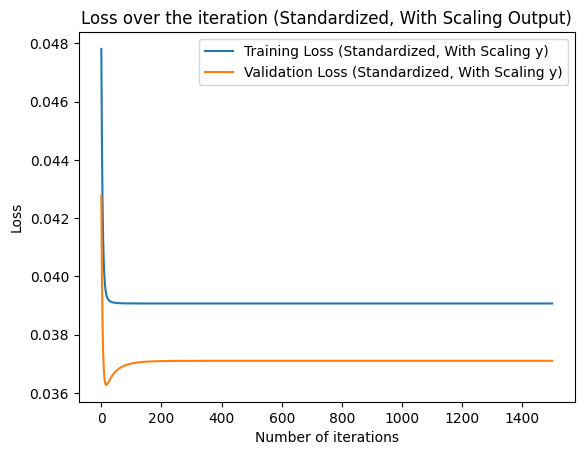

Theta for Standardized Data (With Scaling y): [[0.        ]
 [0.04613296]
 [0.0062963 ]
 [0.05008587]
 [0.03182794]
 [0.01820749]
 [0.01264496]
 [0.01259011]
 [0.01774533]
 [0.03462399]
 [0.01926386]
 [0.02214064]]


In [35]:
plt.plot(range(num_iterations), loss_train2b1_y, label="Training Loss (Standardized, With Scaling y)")
plt.plot(range(num_iterations), loss_test2b1_y, label="Validation Loss (Standardized, With Scaling y)")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration (Standardized, With Scaling Output)')
plt.legend()
plt.show()
print("Theta for Standardized Data (With Scaling y):", theta2b1_y)


In [36]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Expanded feature set for Problem 1b
variables1 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X_training1b, Y_training1b = preprocess(training, variables1)
X_testing1b, Y_testing1b = preprocess(testing, variables1)

# Normalize and Standardize Data for expanded feature set (only features, no scaling of y)
scaler = MinMaxScaler()
standard = StandardScaler()


<ipython-input-6-8c188dc6f76f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house_data_new = data[variables].replace({'yes': 1, 'no': 0})
<ipython-input-6-8c188dc6f76f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house_data_new = data[variables].replace({'yes': 1, 'no': 0})


In [37]:
x_training_scaler2b = scaler.fit_transform(X_training1b)
x_testing_scaler2b = scaler.transform(X_testing1b)

x_training_normalized2b = standard.fit_transform(X_training1b)
x_testing_normalized2b = standard.transform(X_testing1b)


In [38]:
# Gradient Descent on Normalized Data (Without Scaling y)
theta = np.zeros((12, 1))
num_iterations = 1500
learning_rate = 0.05
theta2b, loss_train2b, loss_test2b = gradient_descent(x_training_scaler2b, x_testing_scaler2b, Y_training1b, Y_testing1b, theta, learning_rate, num_iterations)


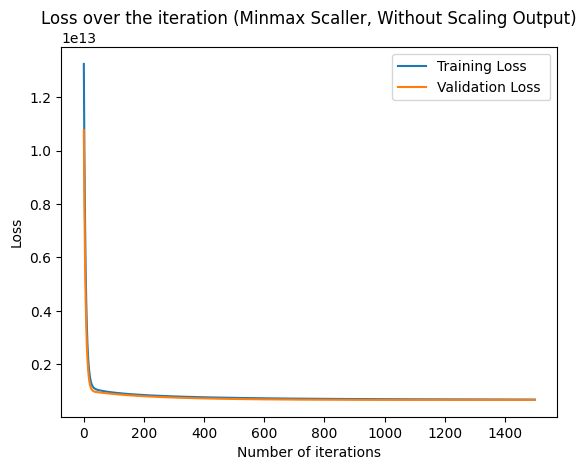

Theta for Minmax Scaller (With y Scaling): [[0.        ]
 [0.23967007]
 [0.07715435]
 [0.25647909]
 [0.10812997]
 [0.05605405]
 [0.03895218]
 [0.02478179]
 [0.0790751 ]
 [0.0794342 ]
 [0.08012832]
 [0.05591604]]


In [39]:
# Plot Loss for Normalized Data (Without Scaling y)
plt.plot(range(num_iterations), loss_train2b, label="Training Loss ")
plt.plot(range(num_iterations), loss_test2b, label="Validation Loss ")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration (Minmax Scaller, Without Scaling Output)')
plt.legend()
plt.show()
print("Theta for Minmax Scaller (With y Scaling):", theta2b_y)



In [40]:

# Gradient Descent on Standardized Data (Without Scaling y)
theta = np.zeros((12, 1))
theta2b1, loss_train2b1, loss_test2b1 = gradient_descent(x_training_normalized2b, x_testing_normalized2b, Y_training1b, Y_testing1b, theta, learning_rate, num_iterations)



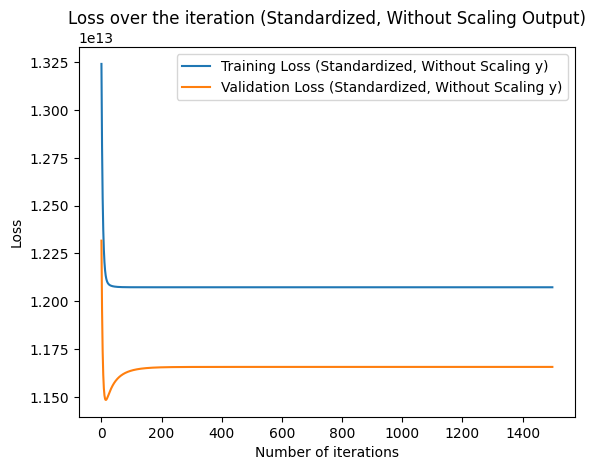

Theta for Standardized Data (With y Scaling): [[0.        ]
 [0.04613296]
 [0.0062963 ]
 [0.05008587]
 [0.03182794]
 [0.01820749]
 [0.01264496]
 [0.01259011]
 [0.01774533]
 [0.03462399]
 [0.01926386]
 [0.02214064]]


In [41]:
# Plot Loss for Standardized Data (Without Scaling y)
plt.plot(range(num_iterations), loss_train2b1, label="Training Loss (Standardized, Without Scaling y)")
plt.plot(range(num_iterations), loss_test2b1, label="Validation Loss (Standardized, Without Scaling y)")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration (Standardized, Without Scaling Output)')
plt.legend()
plt.show()
print("Theta for Standardized Data (With y Scaling):", theta2b1_y)


In [42]:
def gradient_descent_penalty(X_training, X_testing, Y_training, Y_testing, initial_theta, learning_rate, num_iterations, alpha):
    m_training = len(Y_training)
    m_testing = len(Y_testing)
    theta = initial_theta
    training_losses = []
    testing_losses = []

    for i in range(num_iterations):
        predictions_training = X_training.dot(theta)
        error_training = predictions_training - Y_training
        gradient = (X_training.T.dot(error_training) + alpha * theta) / m_training
        gradient[0] = gradient[0] - alpha * theta[0]  # No regularization for theta_0 (bias term)
        theta -= learning_rate * gradient
        training_loss = (np.sum(error_training ** 2) + alpha * np.sum(theta[1:] ** 2)) / (2 * m_training)
        training_losses.append(training_loss)

        predictions_testing = X_testing.dot(theta)
        error_testing = predictions_testing - Y_testing
        testing_loss = np.sum(error_testing ** 2) / (2 * m_testing)
        testing_losses.append(testing_loss)

    return theta, training_losses, testing_losses

In [43]:
alpha = 1  # Regularization parameter
theta = np.zeros((6, 1))
num_iterations = 1500
learning_rate = 0.03
theta3a, loss_train3a, loss_test3a = gradient_descent_penalty(x_training_scaler, x_testing_scaler, Y_training1a, Y_testing1a, theta, learning_rate, num_iterations, alpha)


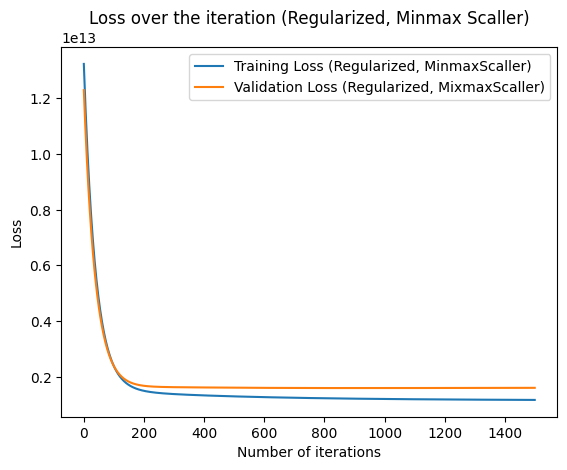

Theta (MinMaxScaler): [[      0.        ]
 [5320286.64478414]
 [5462337.12561416]
 [2247801.17115413]
 [1872342.13796298]
 [1730262.53351237]]


In [44]:
plt.plot(range(num_iterations), loss_train3a, label="Training Loss (Regularized, MinmaxScaller)")
plt.plot(range(num_iterations), loss_test3a, label="Validation Loss (Regularized, MixmaxScaller)")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration (Regularized, Minmax Scaller)')
plt.legend()
plt.show()
print("Theta (MinMaxScaler):", theta3a)


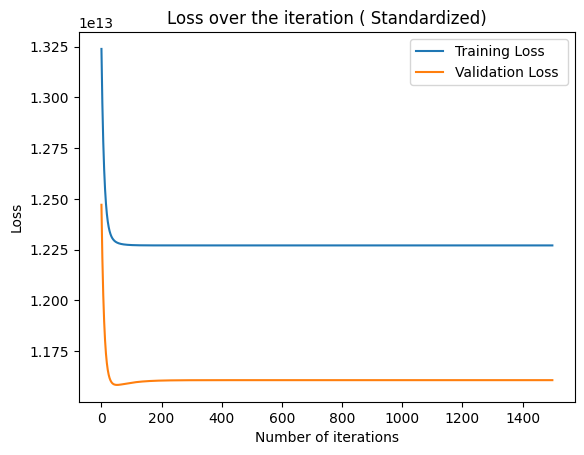

Theta  (Standardized): [[     0.        ]
 [719798.64232877]
 [ 85183.584834  ]
 [632949.60594885]
 [457505.71312364]
 [286727.20904699]]


In [45]:
alpha = 7  # Higher regularization parameter for Standardized data
theta = np.zeros((6, 1))
theta3a1, loss_train3a1, loss_test3a1 = gradient_descent_penalty(x_training_normalized, x_testing_normalized, Y_training1a, Y_testing1a, theta, learning_rate, num_iterations, alpha)
plt.plot(range(num_iterations), loss_train3a1, label="Training Loss ")
plt.plot(range(num_iterations), loss_test3a1, label="Validation Loss ")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration ( Standardized)')
plt.legend()
plt.show()
print("Theta  (Standardized):", theta3a1)

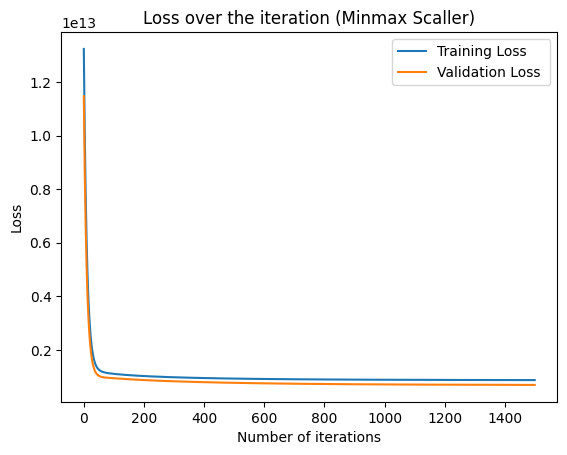

Theta  (Minmax Scsaller , Without Scaling y): [[      0.        ]
 [2308661.71621442]
 [2485988.02771193]
 [2052479.07995864]
 [1377793.70869669]
 [1790689.18816787]
 [ 447634.97020055]
 [ 494152.86472506]
 [ 869563.47937033]
 [1028755.48946961]
 [1058285.42982549]
 [ 609046.61384731]]


In [46]:
alpha = 5  # Regularization parameter

# Gradient Descent on Normalized Data with L2 Regularization (Without Scaling y)
theta = np.zeros((12, 1))
theta3b, loss_train3b, loss_test3b = gradient_descent_penalty(x_training_scaler2b, x_testing_scaler2b, Y_training1b, Y_testing1b, theta, learning_rate, num_iterations, alpha)

# Plot Loss for Normalized Data with Regularization (Without Scaling y)
plt.plot(range(num_iterations), loss_train3b, label="Training Loss ")
plt.plot(range(num_iterations), loss_test3b, label="Validation Loss ")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration (Minmax Scaller)')
plt.legend()
plt.show()
print("Theta  (Minmax Scsaller , Without Scaling y):", theta3b)

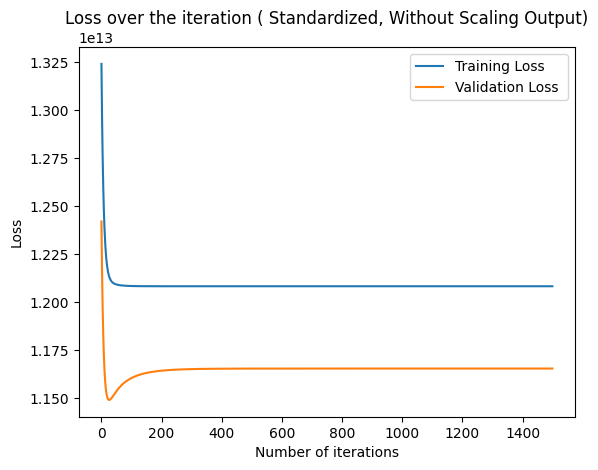

Theta (Standardized, Without Scaling y): [[     0.        ]
 [528347.25932196]
 [ 76401.30377064]
 [573143.1683706 ]
 [364451.34057432]
 [210136.80866517]
 [146745.48099958]
 [143863.45134824]
 [202564.3809399 ]
 [397550.53063508]
 [222538.2521508 ]
 [254384.74789293]]


In [47]:
theta = np.zeros((12, 1))
theta3b1, loss_train3b1, loss_test3b1 = gradient_descent_penalty(x_training_normalized2b, x_testing_normalized2b, Y_training1b, Y_testing1b, theta, learning_rate, num_iterations, alpha)

# Plot Loss for Standardized Data with Regularization (Without Scaling y)
plt.plot(range(num_iterations), loss_train3b1, label="Training Loss ")
plt.plot(range(num_iterations), loss_test3b1, label="Validation Loss ")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration ( Standardized, Without Scaling Output)')
plt.legend()
plt.show()
print("Theta (Standardized, Without Scaling y):", theta3b1)


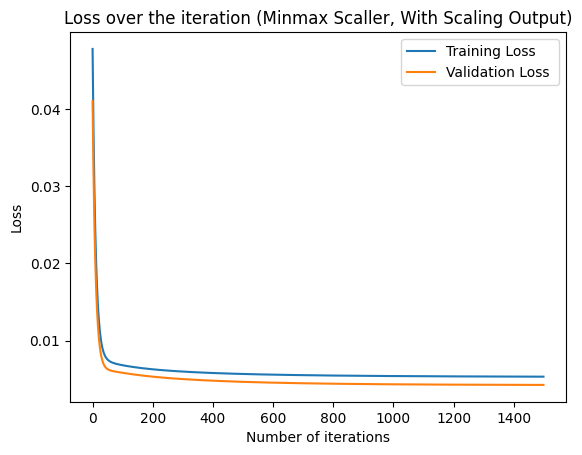

Theta (Minmax Scaller , With Scaling y): [[0.        ]
 [0.16501683]
 [0.08991342]
 [0.1820512 ]
 [0.1098608 ]
 [0.0709163 ]
 [0.04322413]
 [0.02758935]
 [0.06821979]
 [0.08444666]
 [0.08678005]
 [0.05646587]]


In [48]:
Y_training1b_scaled = y_scaler.fit_transform(Y_training1b)
Y_testing1b_scaled = y_scaler.transform(Y_testing1b)

# Gradient Descent on Normalized Data with L2 Regularization (With Scaling y)
theta = np.zeros((12, 1))
theta3b_y, loss_train3b_y, loss_test3b_y = gradient_descent_penalty(x_training_scaler2b, x_testing_scaler2b, Y_training1b_scaled, Y_testing1b_scaled, theta, learning_rate, num_iterations, alpha)

# Plot Loss for Normalized Data with Regularization (With Scaling y)
plt.plot(range(num_iterations), loss_train3b_y, label="Training Loss")
plt.plot(range(num_iterations), loss_test3b_y, label="Validation Loss ")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration (Minmax Scaller, With Scaling Output)')
plt.legend()
plt.show()
print("Theta (Minmax Scaller , With Scaling y):", theta3b_y)


Theta (Standardized, With Scaling y): [[0.        ]
 [0.04574435]
 [0.00661483]
 [0.04962279]
 [0.03155423]
 [0.01819366]
 [0.01270524]
 [0.01245571]
 [0.01753804]
 [0.03441996]
 [0.01926738]
 [0.02202465]]


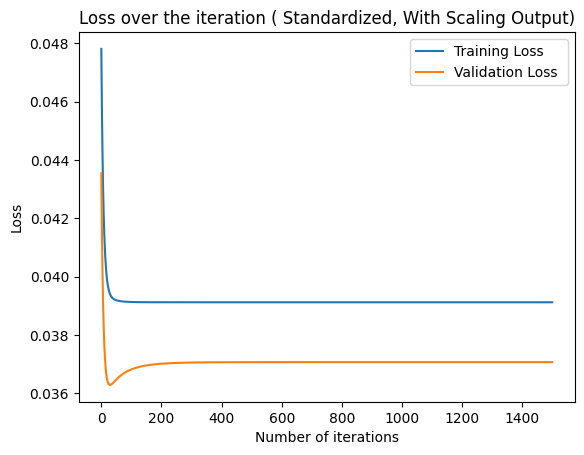

In [49]:
theta = np.zeros((12, 1))
theta3b1_y, loss_train3b1_y, loss_test3b1_y = gradient_descent_penalty(x_training_normalized2b, x_testing_normalized2b, Y_training1b_scaled, Y_testing1b_scaled, theta, learning_rate, num_iterations, alpha)

# Plot Loss for Standardized Data with Regularization (With Scaling y)
plt.plot(range(num_iterations), loss_train3b1_y, label="Training Loss ")
plt.plot(range(num_iterations), loss_test3b1_y, label="Validation Loss ")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration ( Standardized, With Scaling Output)')
plt.legend()
plt.show
print("Theta (Standardized, With Scaling y):", theta3b1_y)